# Deep Learning using H2O in R : Customer Churn Predictions

In the targeted approach the company tries to identify in advance customers who are likely to churn. The company then targets those customers with special programs or incentives. This approach can bring in huge loss for a company, if churn predictions are inaccurate, because then firms are wasting incentive money on customers who would have stayed anyway. There are numerous predictive modeling techniques for predicting customer churn.

The data files state that the data are "artificial based on claims similar to real world". These data are also contained in the C50 R package. Data and associated files are also available at: http://www.sgi.com/tech/mlc/db/churn.data

We would like to make good use of Neural Networks using R  with the very efficient H2O package. 

Lets start off by loading libraries

In [1]:
library(caTools)
library(ggplot2)
library(GGally)

Now read the dataset from the url and view it.

In [2]:
# Importing the dataset
custchurn <- read.csv(url("http://www.sgi.com/tech/mlc/db/churn.data"),header =FALSE)

In [3]:
head(custchurn,10)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,⋯,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,⋯,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,⋯,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,⋯,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,⋯,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
AL,118,510,391-8027,yes,no,0,223.4,98,37.98,⋯,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
MA,121,510,355-9993,no,yes,24,218.2,88,37.09,⋯,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
MO,147,415,329-9001,yes,no,0,157.0,79,26.69,⋯,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
LA,117,408,335-4719,no,no,0,184.5,97,31.37,⋯,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,⋯,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


Data is in a very usable format. Check for NA's

## Data Preprocessing

In [4]:
sum(is.na(custchurn))

[1] 0

Now assign the column names from the description

In [5]:
colnames(custchurn) <- c("state","account_length","area_code","phone_number","international_plan","voice_mail_plan","number_vmail_messages","total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls","churned")

In [6]:
custchurn

state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,⋯,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,⋯,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,⋯,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,⋯,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,⋯,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,⋯,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
AL,118,510,391-8027,yes,no,0,223.4,98,37.98,⋯,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
MA,121,510,355-9993,no,yes,24,218.2,88,37.09,⋯,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
MO,147,415,329-9001,yes,no,0,157.0,79,26.69,⋯,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
LA,117,408,335-4719,no,no,0,184.5,97,31.37,⋯,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,⋯,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


The variables state, area_code, phone_number are not predictors. So lets remove them

In [7]:
custchurn <- custchurn[,c(-1,-3,-4)]
# Do a random shuffle to the dataset
custchurn <- custchurn[sample(1:nrow(custchurn)),]
head(custchurn,10)
str(custchurn)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
875,103,no,no,0,204.9,107,34.83,135.2,102,11.49,208.2,106,9.37,10.4,3,2.81,5,False.
2808,52,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,False.
3160,27,no,no,0,227.4,67,38.66,248.0,115,21.08,61.4,109,2.76,7.8,6,2.11,1,False.
2878,133,no,no,0,176.8,92,30.06,187.5,97,15.94,196.8,88,8.86,6.5,3,1.76,2,False.
2910,99,no,no,0,174.1,102,29.60,99.1,118,8.42,211.6,126,9.52,7.7,2,2.08,2,False.
431,46,no,no,0,250.3,100,42.55,260.6,90,22.15,195.0,104,8.78,13.3,2,3.59,2,True.
1764,93,no,yes,42,166.9,101,28.37,273.2,84,23.22,171.0,106,7.69,11.5,1,3.11,1,False.
231,93,yes,no,0,312.0,109,53.04,129.4,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.
2947,82,no,yes,19,146.5,73,24.91,246.4,65,20.94,199.0,114,8.96,4.1,4,1.11,1,False.
2730,122,no,no,0,119.3,93,20.28,223.9,103,19.03,211.9,122,9.54,8.7,4,2.35,2,False.


'data.frame':	3333 obs. of  18 variables:
 $ account_length               : int  103 52 27 133 99 46 93 93 82 122 ...
 $ international_plan           : Factor w/ 2 levels " no"," yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ voice_mail_plan              : Factor w/ 2 levels " no"," yes": 1 1 1 1 1 1 2 1 2 1 ...
 $ number_vmail_messages        : int  0 0 0 0 0 0 42 0 19 0 ...
 $ total_day_minutes            : num  205 217 227 177 174 ...
 $ total_day_calls              : int  107 104 67 92 102 100 101 109 73 93 ...
 $ total_day_charge             : num  34.8 36.9 38.7 30.1 29.6 ...
 $ total_eve_minutes            : num  135.2 152.3 248 187.5 99.1 ...
 $ total_eve_calls              : int  102 83 115 97 118 90 84 100 65 103 ...
 $ total_eve_charge             : num  11.49 12.95 21.08 15.94 8.42 ...
 $ total_night_minutes          : num  208.2 134.3 61.4 196.8 211.6 ...
 $ total_night_calls            : int  106 109 109 88 126 104 106 74 114 122 ...
 $ total_night_charge           : num  9.37 6.04 2.7

Obeserve that the target feature 'churned' and input features 'international_plan','voice_mail_plan' are categorical variables which need to be converted to numeric as required by the Deep Learning package, H2O that we are going to use.

### Encoding categorical features

In [8]:
custchurn$international_plan <- as.numeric(custchurn$international_plan)
custchurn$voice_mail_plan <- as.numeric(custchurn$voice_mail_plan)
custchurn$churned <- as.numeric(custchurn$churned)
custchurn$churned <- ifelse(custchurn$churned == 2,1,0)
str(custchurn)

'data.frame':	3333 obs. of  18 variables:
 $ account_length               : int  103 52 27 133 99 46 93 93 82 122 ...
 $ international_plan           : num  1 1 1 1 1 1 1 2 1 1 ...
 $ voice_mail_plan              : num  1 1 1 1 1 1 2 1 2 1 ...
 $ number_vmail_messages        : int  0 0 0 0 0 0 42 0 19 0 ...
 $ total_day_minutes            : num  205 217 227 177 174 ...
 $ total_day_calls              : int  107 104 67 92 102 100 101 109 73 93 ...
 $ total_day_charge             : num  34.8 36.9 38.7 30.1 29.6 ...
 $ total_eve_minutes            : num  135.2 152.3 248 187.5 99.1 ...
 $ total_eve_calls              : int  102 83 115 97 118 90 84 100 65 103 ...
 $ total_eve_charge             : num  11.49 12.95 21.08 15.94 8.42 ...
 $ total_night_minutes          : num  208.2 134.3 61.4 196.8 211.6 ...
 $ total_night_calls            : int  106 109 109 88 126 104 106 74 114 122 ...
 $ total_night_charge           : num  9.37 6.04 2.76 8.86 9.52 8.78 7.69 9.79 8.96 9.54 ...
 $ total_intl_m

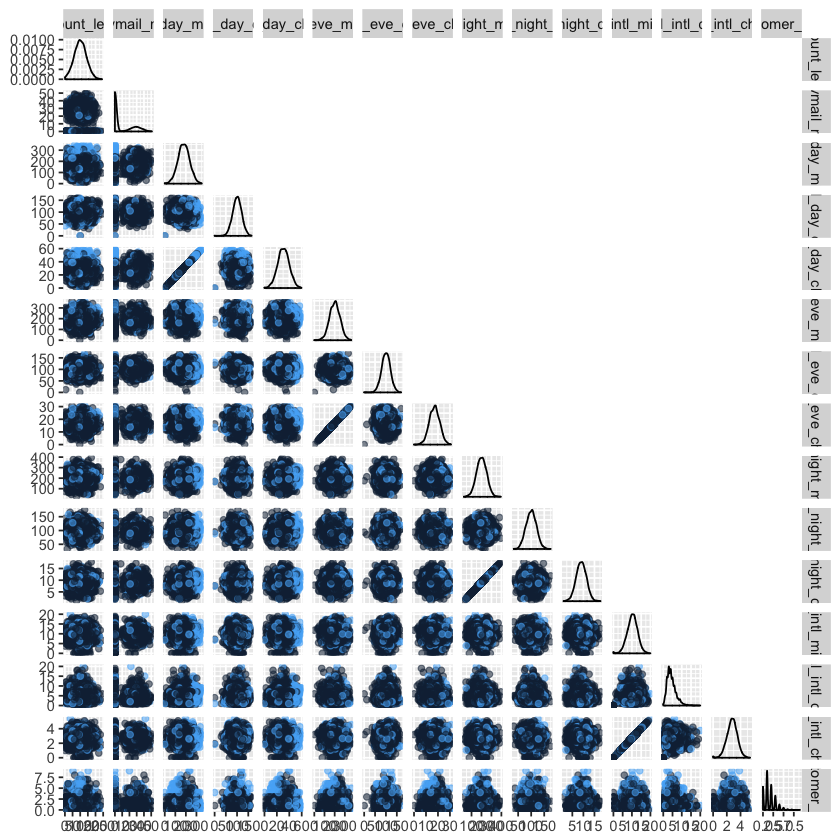

In [9]:
ggpairs(custchurn, columns = c(1,4,5,6,7,8,9,10,11,12,13,14,15,16,17), upper = "blank", aes(colour = churned, alpha = 0.8))

Though the pariplot is highly compressed because of the large volume of data as well as the number of features, the fact to infer is that the data complexities are to be captured by an efficient algorithm.

### Splitting to training and test sets

In [10]:
set.seed(123)
split <- sample.split(custchurn$churned, SplitRatio = 0.8)
training_set <- subset(custchurn, split == TRUE)
test_set <- subset(custchurn, split == FALSE)

### Feature Scaling

In [11]:
# Feature Scaling must to do in Deep Learning
training_set[,c(-2,-3,-18)] <- scale(training_set[,c(-2,-3,-18)])
test_set[,c(-2,-3,-18)] <- scale(test_set[,c(-2,-3,-18)])
head(training_set,5)
head(test_set,5)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
875,0.03864853,1,1,-0.5892658,0.4696853,0.32285974,0.4692987,-1.3222446,0.08255874,-1.3227600,0.1581170,0.3057942,0.1585173,0.04837058,-0.6127840,0.05030866,2.6080493,0
2808,-1.24899803,1,1,-0.5892658,0.6919739,0.17521080,0.6919118,-0.9812926,-0.87265603,-0.9802844,-1.3087961,0.4590074,-1.3103392,0.54503729,-0.2049752,0.54963946,0.3263628,0
3160,-1.88019732,1,1,-0.5892658,0.8830319,-1.64579270,0.8831861,0.9268419,0.73612674,0.9267885,-2.7558593,0.4590074,-2.7571409,-0.87401046,0.6106425,-0.86951125,-0.4341994,0
1764,-0.21383119,1,2,2.4729365,-0.2284111,0.02756187,-0.2287986,1.4292973,-0.82238157,1.4287733,-0.5803020,0.3057942,-0.5825274,0.43860871,-1.4284016,0.44451719,-0.4341994,0
231,-0.21383119,2,1,-0.5892658,2.4372150,0.42129236,2.4371551,-1.4378891,-0.01799019,-1.4377004,0.3447068,-1.3284798,0.3437785,0.08384677,-1.0205928,0.08972951,-1.1947616,1


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
2878,0.82517840,1,1,-0.6009619,-0.08682206,-0.44180338,-0.08643155,-0.21448358,-0.1068612,-0.21397511,-0.1290365,-0.6394396,-0.1273422,-1.3547587,-0.5554100,-1.3482791,0.3558597,0
2910,-0.01102499,1,1,-0.6009619,-0.13626640,0.08301025,-0.13598390,-1.88624653,0.9413211,-1.88710854,0.1594139,1.3062070,0.1585105,-0.9071431,-0.9559056,-0.9062530,0.3558597,0
431,-1.31451852,1,1,-0.6009619,1.25916278,-0.02195247,1.25902236,1.16793578,-0.4562553,1.16769492,-0.1641183,0.1797800,-0.1619910,1.1817299,-0.9559056,1.1795578,0.3558597,1
2730,0.55464201,1,1,-0.6009619,-1.13980339,-0.38932202,-1.13995751,0.47388940,0.1926195,0.47352254,0.1652609,1.1014021,0.1671727,-0.5341301,-0.1549144,-0.5332934,0.3558597,0
1085,0.28410562,1,1,-0.6009619,1.36171401,-0.17939656,1.36135872,0.09944476,1.4903690,0.09973741,-0.6260288,-0.8442445,-0.6254188,0.8087169,0.2455813,0.8065983,1.1141934,0


Now load the H2O library and initialize it. Note that h2o.init ( ) requires Java VM and JDK pre-installed

In [12]:
library(h2o)
h2o.init(nthreads = -1)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         6 hours 7 minutes 
    H2O cluster version:        3.10.5.3 
    H2O cluster version age:    11 days  
    H2O cluster name:           H2O_started_from_R_nidhinabraham_mqi017 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.76 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.3.2 (2016-10-31) 



Successfully connected to a GPU in a remote server. 

## Building the classifier

We build a classifier using the h2o.deeplearning function, with 'churned' as the target. 

The activation function used is 'Rectifier'. hidden(6,6) implies we are implementing two hidden layers with 6 neurons in each layer. Number of iterations = 100

In [13]:
# Building the classifier
classifier <- h2o.deeplearning(y = 'churned',
                         training_frame = as.h2o(training_set),
                         activation = 'Rectifier',
                         hidden = c(6,6),
                         epochs = 100,
                         train_samples_per_iteration = -2)

  |======================================================================| 100%
  |======================================================================| 100%


Now print the summary statistics

In [14]:
summary(classifier)

Model Details:

H2ORegressionModel: deeplearning
Model Key:  DeepLearning_model_R_1499811230564_7 
Status of Neuron Layers: predicting churned, regression, gaussian distribution, Quadratic loss, 157 weights/biases, 7.4 KB, 266,600 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    17     Input  0.00 %                                              
2     2     6 Rectifier  0.00 % 0.000000 0.000000  0.000329 0.000135 0.000000
3     3     6 Rectifier  0.00 % 0.000000 0.000000  0.000492 0.000501 0.000000
4     4     1    Linear         0.000000 0.000000  0.000114 0.000021 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2   -0.006846   0.309629  0.513163 0.448745
3    0.105829   0.494686  0.900512 0.347932
4    0.099873   0.736693  0.203459 0.000000

H2ORegressionMetrics: deeplearning
** Reported on training data. **
** Metrics reported on full training frame **

MSE:  0

From above we observe that the three variables most important for predicting the target feature are:
1. total_day_minutes
2. total_day_charge
3. number_customer_service_calls

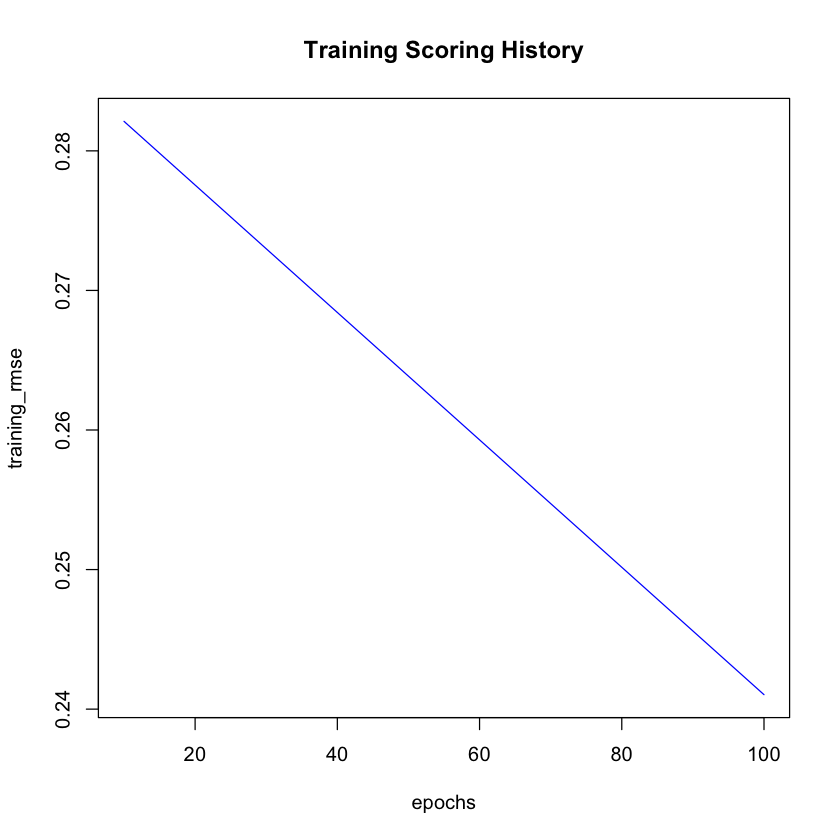

In [15]:
plot(classifier)

training set RMSE is steadily decreasing, its a sign that our model is performing well.

## Making Predictions

To make predictions , we make use of the h2o.predict( ) and it requires the dataset to be in the .h2o format.

In [16]:
# Predicting the Test set results
y_pred = h2o.predict(classifier, newdata = as.h2o(test_set[-18]))
y_pred = (y_pred > 0.5) 
y_pred = as.vector(y_pred) #converting h2o object, y_pred, to vector

  |======================================================================| 100%
  |======================================================================| 100%


 Also, we have converted y_pred, which is an h2o object into a vector

Now create the confusion matrix and obtain the accuracy of predictions

In [17]:
# Making the Confusion Matrix
cm <- table(test_set[,18], y_pred)
cm

   y_pred
      0   1
  0 560  10
  1  34  63

In [18]:
h2o.shutdown()

Are you sure you want to shutdown the H2O instance running at http://localhost:54321/ (Y/N)? 


In [19]:
Accuracy <- sum(diag(cm))/nrow(test_set)
Accuracy

[1] 0.934033

## Concluding Remarks


1. The accuracy of the Deep Learning model built using the H2O package, for the test set turns out to be as good as 93.4%

2. The model summary indicates that relevant features for churn prediction could be : total_day_minutes, total_day_charge, number_customer_service_calls. ie the telecom company must watch out its the customer service calls as well as the charges for day calls. This could be a very important business directive, to avoid customer churn

3. The model accuracy can be further upscaled by adding more hidden layers and by parameter tuning